In [1]:
from sympy import *
init_printing()

## Tetrahedron FEM
For 2d of 3d FEM using triangular or tetrahedron cells we use the following base function
$$
\phi(\vec{x}) = \vec{a} \cdot \vec{x} + b
$$
with the derivatives
$$
\frac{\partial \phi}{\partial x_i} = a_i
$$

### 2d Triangular FEM
Given a cell $(\bullet)_c$ the coefficients $\vec{a}_v$ and $b_v$ of a $\phi_{c, v}$ centered on a vertec $v$ can be found as
$$
\phi_{c, v}(\vec{x}_k) = 1\\
\phi_{c, v}(\vec{x}_{k + 1}) = 0\\
\phi_{c, v}(\vec{x}_{k + 2}) = 0
$$

### Cartesian homegeneous heat equation
Given the heat equation
$$
T_{xx} + T_{yy} = 0
$$
we can write
$$
\sum_{i = 1}^{N - 1} T_i \underbrace{\int_{\Omega} \frac{\partial\phi_{i}}{\partial x} \frac{\partial\phi}{\partial x} +  \frac{\partial\phi_{i}}{\partial y} \frac{\partial\phi}{\partial y}\mathrm{d}x \mathrm{d}y}_{[\phi_i, \phi]_x + [\phi_i, \phi]_y} = 0
$$
Thus we have to solve
$$
[\phi_i, \phi_i]_{x_i} = ???\\
[\phi_{i + 1}, \phi_i]_{x_i} = ???\\
[\phi_{i + 2}, \phi_i]_{x_i} = ???
$$

### Solution on a Unit triangle
On a unit triagle we get using the definitions
\begin{align}
\Delta x_{10} &= x_{i + 1} - x_i\\
\Delta x_{20} &= x_{i + 2} - x_i\\
\Delta y_{10} &= y_{i + 1} - y_i\\
\Delta y_{20} &= y_{i + 2} - y_i
\end{align}
we get
$$
x(\xi, \eta) = x_i + \Delta x_{10} \xi + \Delta x_{20} \eta\\
y(\xi, \eta) = y_i + \Delta y_{10} \xi + \Delta y_{20} \eta
$$
and
\begin{align}
\xi(x, y) &=\frac{1}{det(J(x,y))} \bigg(\Delta y_{20}(x - x_i) - \Delta x_{20}(y - y_i)\bigg)\\
\eta(x, y) &=\frac{1}{det(J(x,y))} \bigg(-\Delta y_{10}(x - x_i) + \Delta x_{10}(y - y_i)\bigg)
\end{align}
This gives as the base functions
\begin{align}
\phi_i(\xi, \eta) &=-\xi -\eta +1\\
\phi_{i+1}(\xi, \eta) &=\xi\\
\phi_{i+2}(\xi, \eta) &=\eta
\end{align}
with the derivations for the base coordinates
$$
J(x,y)=
\begin{pmatrix}
x_{\xi} & x_{\eta}\\
y_{\xi} & y_{\eta}
\end{pmatrix}
=
\begin{pmatrix}
\Delta x_{10} & \Delta x_{20}\\
\Delta y_{10} & \Delta y_{20}
\end{pmatrix}
$$
with the derivations for the derived coordinates
$$
J(\xi,\eta)=
\begin{pmatrix}
\xi_{x} & \xi_{y}\\
\eta_{x} & \eta_{y}
\end{pmatrix}
=\frac{1}{det(J(x, y))}
\begin{pmatrix}
\Delta y_{20} & -\Delta x_{20}\\
-\Delta y_{10} & \Delta x_{10}
\end{pmatrix}
$$
and the derivations for the base functions
\begin{align}
J(\phi_i) &=
\begin{pmatrix}
(\phi_i)_{\xi} & (\phi_i)_{\eta}
\end{pmatrix}
=
\begin{pmatrix}
-1 & -1
\end{pmatrix}\\
J(x,y) &=
\begin{pmatrix}
(\phi_{i+1})_{\xi} & (\phi_{i+1})_{\eta}
\end{pmatrix}
=
\begin{pmatrix}
1 & 0
\end{pmatrix}\\
J(x,y) &=
\begin{pmatrix}
(\phi_{i+2})_{\xi} & (\phi_{i+1})_{\eta}
\end{pmatrix}
=
\begin{pmatrix}
0 & 1
\end{pmatrix}
\end{align}
This gives us the determinant of the Jacobina as
$$
\mathrm{det}(J) = \Delta x_{10} \Delta y_{20} - \Delta x_{20} \Delta y_{10}
$$

We need also to transform the derevatives as
$$
\frac{\partial u}{\partial x} = \frac{\partial u}{\partial \xi}\frac{\partial \xi}{\partial x} + \frac{\partial u}{\partial \eta}\frac{\partial \eta}{\partial x}\\
\frac{\partial u}{\partial y} = \frac{\partial u}{\partial \xi}\frac{\partial \xi}{\partial y} + \frac{\partial u}{\partial \eta}\frac{\partial \eta}{\partial y}
$$
and the integral
$$
\int_0^1 \int_0^{1 - \eta}U\,\mathrm{det}(J)\,\mathrm{d}\xi\mathrm{d}\eta
$$

### Integrals
The integrals can now be calculated as
Which leads to
\begin{align}
[\phi_i, \phi_i]_{x} &= \frac{1}{det(J(x,y))} \int_0^1 \int_0^{1 - \eta} \left(\frac{\partial \phi_i}{\partial \xi}\frac{\partial \xi}{\partial x} + \frac{\partial \phi_i}{\partial \eta}\frac{\partial \eta}{\partial x}\right)^2 d\xi d\eta\\
&= \frac{1}{det(J(x,y))} \int_0^1 \int_0^{1 - \eta} \left(-\Delta y_{20} + \Delta y_{10}\right)^2 d\xi d\eta\\
&= \frac{1}{2}\frac{\left(-\Delta y_{20} + \Delta y_{10}\right)^2}{det(J(x,y))}
\end{align}
and
\begin{align}
[\phi_i, \phi_i]_{y} &= \frac{1}{det(J(x,y))} \int_0^1 \int_0^{1 - \eta} \left(\frac{\partial \phi_i}{\partial \xi}\frac{\partial \xi}{\partial y} + \frac{\partial \phi_i}{\partial \eta}\frac{\partial \eta}{\partial y}\right)^2 d\xi d\eta\\
&= \frac{1}{det(J(x,y))} \int_0^1 \int_0^{1 - \eta} \left(\Delta x_{20} - \Delta x_{10}\right)^2 d\xi d\eta\\
&= \frac{1}{2}\frac{\left(\Delta x_{20} - \Delta x_{10}\right)^2}{det(J(x,y))}
\end{align}
and
\begin{align}
[\phi_{i}, \phi_{i+1}]_{x} &= \frac{1}{det(J(x,y))} \int_0^1 \int_0^{1 - \eta} \left(\frac{\partial \phi_i}{\partial \xi}\frac{\partial \xi}{\partial x} + \frac{\partial \phi_i}{\partial \eta}\frac{\partial \eta}{\partial x}\right)\left(\frac{\partial \phi_{i+1}}{\partial \xi}\frac{\partial \xi}{\partial x} + \frac{\partial \phi_{i+1}}{\partial \eta}\frac{\partial \eta}{\partial x}\right) d\xi d\eta\\
&= \frac{1}{det(J(x,y))} \int_0^1 \int_0^{1 - \eta} \left(-\Delta y_{20} + \Delta y_{10}\right)(\Delta y_{20}) d\xi d\eta\\
&= \frac{1}{2}\frac{\left(-\Delta y_{20} + \Delta y_{10}\right)\Delta y_{20}}{det(J(x,y))}
\end{align}
and
\begin{align}
[\phi_{i}, \phi_{i+1}]_{y} &= \frac{1}{det(J(x,y))} \int_0^1 \int_0^{1 - \eta} \left(\frac{\partial \phi_i}{\partial \xi}\frac{\partial \xi}{\partial y} + \frac{\partial \phi_i}{\partial \eta}\frac{\partial \eta}{\partial y}\right)\left(\frac{\partial \phi_{i+1}}{\partial \xi}\frac{\partial \xi}{\partial y} + \frac{\partial \phi_{i+1}}{\partial \eta}\frac{\partial \eta}{\partial y}\right) d\xi d\eta\\
&= \frac{1}{det(J(x,y))} \int_0^1 \int_0^{1 - \eta} \left(\Delta x_{20} - \Delta x_{10}\right)(-\Delta x_{20}) d\xi d\eta\\
&= -\frac{1}{2}\frac{\left(\Delta x_{20} - \Delta x_{10}\right)\Delta x_{20}}{det(J(x,y))}
\end{align}
and
\begin{align}
[\phi_i, \phi_i]_{x} &= \frac{1}{2}\frac{\left(-\Delta y_{20} + \Delta y_{10}\right)^2}{det(J(x,y))}\\
[\phi_i, \phi_i]_{y} &=\frac{1}{2}\frac{\left(\Delta x_{20} - \Delta x_{10}\right)^2}{det(J(x,y))}\\
[\phi_{i}, \phi_{i+1}]_{x} &=\frac{1}{2}\frac{\left(-\Delta y_{20} + \Delta y_{10}\right)\Delta y_{20}}{det(J(x,y))}\\
[\phi_{i}, \phi_{i+1}]_{y} &=-\frac{1}{2}\frac{\left(\Delta x_{20} - \Delta x_{10}\right)\Delta x_{20}}{det(J(x,y))}\\
[\phi_{i+2}, \phi_i]_{x} &= -\frac{1}{2}\frac{\left(-\Delta y_{20} + \Delta y_{10}\right)\Delta y_{10}}{det(J(x,y))}\\
[\phi_{i+2}, \phi_i]_{y} &= \frac{1}{2}\frac{\left(\Delta x_{20} - \Delta x_{10}\right)\Delta x_{10}}{det(J(x,y))}
\end{align}

## Rotational FEM
For the version with cyldrical coordinaes the the values have to be multiplied by a factor that comes from the inclusion of $r$ in the integral 
$$
\int r U d\xi d\eta = (\Delta y_{10}/6 + \Delta y_{20}/6 + y_i/2) \int U d\xi d\eta
$$
**instead** of $\frac{1}{2}$.

## Neumann Boundary conditions
We use the simplistic approach of weighted gradients over the cell boundary as
$$
\vec{n} \cdot \nabla T = \frac{L_0 \left(\vec{n}_0 \cdot \nabla T_0\right) + L_1 \left(\vec{n}_1 \cdot \nabla T_1\right)}{L_0 + L_1}
$$
were $L$ is the side length of the triangle.
For the temperature we have

$$
T(\xi, \eta) = T_i (1 - \xi - \eta) + T_{i+1} \xi + T_{i + 2} \eta.
$$

For the gradient $\nabla_{x, y} T(\xi, \eta)$ we use the transformed derivatives from section aboove and get

\begin{align}
\frac{\partial T(\xi, \eta)}{\partial x} &= \frac{\partial T(\xi, \eta)}{\partial \xi}\frac{\partial \xi}{\partial x} + \frac{\partial T(\xi, \eta)}{\partial \eta}\frac{\partial \eta}{\partial x}\\
\frac{\partial T(\xi, \eta)}{\partial y} &= \frac{\partial T(\xi, \eta)}{\partial \xi}\frac{\partial \xi}{\partial y} + \frac{\partial T(\xi, \eta)}{\partial \eta}\frac{\partial \eta}{\partial y}.
\end{align}

And therefore we get

\begin{align}
\frac{\partial T(\xi, \eta)}{\partial x} &= \frac{1}{\mathrm{det}(J(x, y))}\big(T_i (\Delta y_{10} - \Delta y_{20}) + T_{i+1} \Delta y_{20} - T_{i+2} \Delta y_{10} \big)\\
\frac{\partial T(\xi, \eta)}{\partial y} &= \frac{1}{\mathrm{det}(J(x, y))}\big(T_i (\Delta x_{20} - \Delta x_{10}) - T_{i+1} \Delta x_{20} + T_{i+2} \Delta x_{10} \big).
\end{align}

Therefore we have

\begin{align}
\vec{n} \cdot \nabla T = \frac{1}{\mathrm{det}(J(x, y))} \left[ T_i \big\{n_0 (\Delta y_{10} - \Delta y_{20}) +  n_1 (\Delta x_{20} - \Delta x_{10})\big\} + T_{i+1} \big\{n_0 \Delta y_{20}  - n_1 \Delta x_{20} \big\} - T_{i+2} \big\{n_0 \Delta y_{10}  - n_1 \Delta x_{10} \big\} \right].
\end{align}

Now we can write as a shorthand
$$
\vec{n} \cdot \nabla T = C_i T_i + C_{i + 1} T_{i + 1} + C_{i + 2} T_{i + 2}
$$
were
\begin{align}
C_i &= \frac{n_0 (\Delta y_{10} - \Delta y_{20}) +  n_1 (\Delta x_{20} - \Delta x_{10})}{\mathrm{det}(J(x, y))}\\
C_{i + 1} &= \frac{n_0 \Delta y_{20}  - n_1 \Delta x_{20}}{\mathrm{det}(J(x, y))}\\
C_{i + 2} &= \frac{-n_0 \Delta y_{10}  + n_1 \Delta x_{10}}{\mathrm{det}(J(x, y))}.
\end{align}

Now using $\tilde{L}_0 = \frac{L_0}{L_0 + L_1}$ we get

$$
\vec{n} \cdot \nabla T = T_i (\tilde{L}_0 C_{0, i} + \tilde{L}_1 C_{1, i}) + T_{0, i + 1} \tilde{L}_0 C_{0, i + 1} + T_{0, i + 2} \tilde{L}_0 C_{0, i + 2} + T_{1, i + 1} \tilde{L}_1 C_{1, i + 1} + T_{1, i + 2} \tilde{L}_1 C_{1, i + 2}.
$$

In [2]:
a0, a1, b = symbols("a_0 a_1 b", real=True)
x_i, y_i = symbols("x_i y_i", real=True)
x_ip, y_ip= symbols("x_{i+1} y_{i+1}", real=True)
x_ipp, y_ipp= symbols("x_{i+2} y_{i+2}", real=True)
x, y = symbols("x y", real=True)
xi, eta = symbols("xi eta")

In [3]:
J = Matrix([[x_ip - x_i, x_ipp - x_i], [y_ip - y_i, y_ipp - y_i]])
det_J = factor(J.det(), (x_i, x_ip, x_ipp))
det_J

In [4]:
phi_i = -xi - eta - 1
phi_ip = xi
phi_ipp = eta

In [5]:
f_xi = (Matrix([[y_ipp - y_i, -(x_ipp - x_i)], [-(y_ip - y_i), x_ipp - x_i]]) * Matrix([x - x_i, y - y_i])/det_J)[0]
f_eta = (Matrix([[y_ipp - y_i, -(x_ipp - x_i)], [-(y_ip - y_i), x_ipp - x_i]]) * Matrix([x - x_i, y - y_i])/det_J)[1]

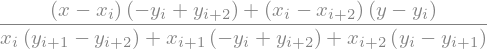

In [6]:
f_xi

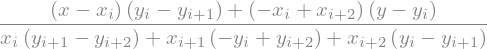

In [7]:
f_eta

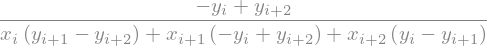

In [8]:
dxi_dx = diff(f_xi, x)
dxi_dx

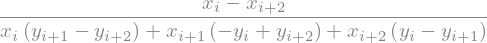

In [9]:
dxi_dy = diff(f_xi, y)
dxi_dy

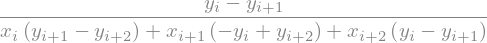

In [10]:
deta_dx = diff(f_eta, x)
deta_dx

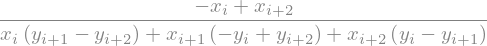

In [11]:
deta_dy = diff(f_eta, y)
deta_dy

In [12]:
diff_phi_i_dx = diff(phi_i, xi)*dxi_dx + diff(phi_i, eta)*deta_dx
diff_phi_i_dy = diff(phi_i, xi)*deta_dy + diff(phi_i, eta)*deta_dy

diff_phi_ip_dx = diff(phi_ip, xi)*dxi_dx + diff(phi_ip, eta)*deta_dx
diff_phi_ip_dy = diff(phi_ip, xi)*deta_dy + diff(phi_ip, eta)*deta_dy

diff_phi_ipp_dx = diff(phi_ipp, xi)*dxi_dx + diff(phi_ipp, eta)*deta_dx
diff_phi_ipp_dy = diff(phi_ipp, xi)*deta_dy + diff(phi_ipp, eta)*deta_dy

In [13]:
int_ii = integrate(integrate(1, (xi, 0, 1 - eta)), (eta, 0, 1))
#factor(int_ii, (x_i, x_ip, x_ipp))

In [14]:
int_ii

In [15]:
y_i, dy10, dy20, xi, eta = symbols("y_i dy_{10} dy_{20} xi eta")
r = y_i + xi*dy10 + eta*dy20
print(integrate(integrate(r, (xi, 0, 1 - eta)), (eta, 0, 1)))

dy_{10}/6 + dy_{20}/6 + y_i/2


In [16]:
r